# Example 17
---
This example demonstrates the usage of class `SolarRadiation` in module `sun.correlation` This class uses the correlations from [1] to prepare reasonable radiation data based on solely the **monthly average daily clearness index** for a given month at a given location. The solar radiation data is generated based on a random distribution of the daily clearness indexes in the specified month. This distribution is derived from a cumulative histogram as described in [1], §2.9. This means that for a given day in the month different results may appear each time we run this notebook. 

[1] Duffie, J. A., Beckman, W. A., & Blair, N. (2020). 
SOLAR ENGINEERING OF THERMAL PROCESSES, PHOTOVOLTAICS AND WIND. 
John Wiley & Sons.

In [1]:
import sys
sys.path.append("C:/Users/Tom/PycharmProjects/cooling-load-calc/")

In [2]:
import pandas as pd
from datetime import datetime
from hvac import Quantity
from hvac.sun.surface import Location, Surface
from hvac.sun.correlation import SolarRadiation

In [3]:
Q_ = Quantity

The location is Brussels:

In [4]:
location = Location(
    fi=Q_(50.8, 'deg'),
    L_loc=Q_(4.2, 'deg')
)

Prepare statistical solar radiation data for the month **June**, in which the monthly average daily clearness index K_T_avg is 0.43 (from [1], Appendix D):

In [5]:
sol_rad = SolarRadiation(
    location=location,
    month=6,
    K_T_avg=0.43
)

## Distribution of Daily Clearness Indexes

In [6]:
df = pd.DataFrame(
    data=[(day_number + 1, K_T) for day_number, K_T in enumerate(sol_rad.K_T_arr)], 
    columns=['day', 'K_T']
)
df = df.set_index(['day'], drop=True)
print(df)

          K_T
day          
1    0.384809
2    0.293920
3    0.260244
4    0.097258
5    0.340310
6    0.738207
7    0.544285
8    0.664396
9    0.123800
10   0.239065
11   0.589485
12   0.182470
13   0.455848
14   0.156456
15   0.508004
16   0.439172
17   0.362174
18   0.626546
19   0.701116
20   0.565196
21   0.606897
22   0.643071
23   0.487463
24   0.717399
25   0.069447
26   0.311064
27   0.215718
28   0.525701
29   0.413290
30   0.683963


## Hourly Irradiation

### Horizontal Surface

**1.**<br>
Get for every hour of **June 1** a statistical estimation of the hourly irradiation components (total, diffuse and beam) incident on a **horizontal surface**:

In [7]:
I_t, I_b, I_d = sol_rad.get_I_distribution(day=1)

Show the data in a dataframe:

In [8]:
df = pd.DataFrame({
    'I_t': [i_t.to('MJ / m**2').m for i_t in I_t],  # total radiation
    'I_b': [i_b.to('MJ / m**2').m for i_b in I_b],  # beam radiation
    'I_d': [i_d.to('MJ / m**2').m for i_d in I_d]   # diffuse radiation
})
print(df)

         I_t       I_b       I_d
0   0.000000  0.000000  0.000000
1   0.000000  0.000000  0.000000
2   0.000000  0.000000  0.000000
3   0.000000  0.000000  0.000000
4   0.000000  0.000000  0.000000
5   0.317259  0.018867  0.298392
6   0.588952  0.048251  0.540701
7   0.886233  0.096001  0.790233
8   1.181882  0.160681  1.021201
9   1.443691  0.232765  1.210927
10  1.639894  0.296042  1.343852
11  1.745060  0.333240  1.411819
12  1.745060  0.333240  1.411819
13  1.639894  0.296042  1.343852
14  1.443691  0.232765  1.210927
15  1.181882  0.160681  1.021201
16  0.886233  0.096001  0.790233
17  0.588952  0.048251  0.540701
18  0.317259  0.018867  0.298392
19  0.000000  0.000000  0.000000
20  0.000000  0.000000  0.000000
21  0.000000  0.000000  0.000000
22  0.000000  0.000000  0.000000
23  0.000000  0.000000  0.000000


**2.**<br>
Show the same data in a plot:

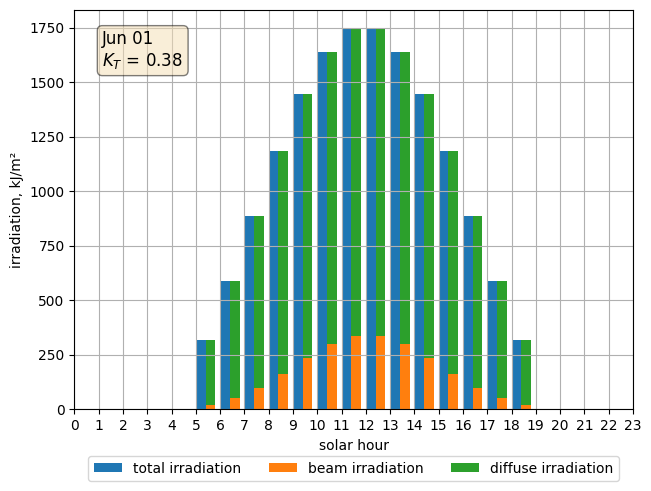

In [9]:
sol_rad.plot_hourly_irradiation(day=1)

**3.**<br>
If we don't specify the day, `get_I_distribution()` returns a list with the hourly irradiation  components for every day of the whole month:

In [10]:
irr_data_by_day = sol_rad.get_I_distribution()

Show the data in a dataframe:

In [11]:
df_lst = []
day_number = 1

for I_t, I_b, I_d in irr_data_by_day:
    df_lst.append(pd.DataFrame({
        'time': [datetime(2023, 6, day_number, hour) for hour in range(0, 24)],
        'I_t': [i_t.to('MJ / m**2').m for i_t in I_t],
        'I_b': [i_b.to('MJ / m**2').m for i_b in I_b],
        'I_d': [i_d.to('MJ / m**2').m for i_d in I_d]
    }))
    day_number += 1

df = pd.concat(df_lst)
df = df.set_index('time', drop=True)

with pd.option_context(
    'display.max_rows', None,
    'display.max_columns', None,
    'display.width', None
):
    print(df)

                          I_t       I_b       I_d
time                                             
2023-06-01 00:00:00  0.000000  0.000000  0.000000
2023-06-01 01:00:00  0.000000  0.000000  0.000000
2023-06-01 02:00:00  0.000000  0.000000  0.000000
2023-06-01 03:00:00  0.000000  0.000000  0.000000
2023-06-01 04:00:00  0.000000  0.000000  0.000000
2023-06-01 05:00:00  0.317259  0.018867  0.298392
2023-06-01 06:00:00  0.588952  0.048251  0.540701
2023-06-01 07:00:00  0.886233  0.096001  0.790233
2023-06-01 08:00:00  1.181882  0.160681  1.021201
2023-06-01 09:00:00  1.443691  0.232765  1.210927
2023-06-01 10:00:00  1.639894  0.296042  1.343852
2023-06-01 11:00:00  1.745060  0.333240  1.411819
2023-06-01 12:00:00  1.745060  0.333240  1.411819
2023-06-01 13:00:00  1.639894  0.296042  1.343852
2023-06-01 14:00:00  1.443691  0.232765  1.210927
2023-06-01 15:00:00  1.181882  0.160681  1.021201
2023-06-01 16:00:00  0.886233  0.096001  0.790233
2023-06-01 17:00:00  0.588952  0.048251  0.540701


**4.**<br>
We can also get the radiation components at a particular hour directly:

In [12]:
I_t, I_d, I_b, _ = sol_rad.hourly_irradiation(day=1, hr1=12)

In [13]:
print(
    f"- total irradiation between 12 and 1 p.m. on June 1 = {I_t.to('kJ/m**2'):~P.1f}",
    f"- beam irradiation between 12 and 1 p.m. on June 1 = {I_b.to('kJ/m**2'):~P.1f}",
    f"- diffuse irradiation between 12 and 1 p.m. on June 1 = {I_d.to('kJ/m**2'):~P.1f}",
    sep='\n'
)

- total irradiation between 12 and 1 p.m. on June 1 = 1745.1 kJ/m²
- beam irradiation between 12 and 1 p.m. on June 1 = 1411.8 kJ/m²
- diffuse irradiation between 12 and 1 p.m. on June 1 = 333.2 kJ/m²


**5.**<br>
Instead of getting the hourly irradiation at a particular hour on a particular day of the month, we can also ask for the monthly average of the hourly irradiation at a particular hour:

In [14]:
hic = sol_rad.avg_hourly_irradiation(hr1=12)

The method returns a named tuple with fields:- `I`: 2-tuple with the monthly average of total irradiation at `hr1` and a `Quantity`-array of the daily values of total irradiation at `hr1`
- `I_b`: same for beam irradiation
- `I_d`: same for sky-diffuse irradiation

In [15]:
print(
    f"- monthly average of total irradiation between 12 and 1 p.m. in June = {hic.I[0].to('kJ / m**2'):~P.1f}",
    f"- monthly average of beam irradiation between 12 and 1 p.m. in June = {hic.I_b[0].to('kJ / m**2'):~P.1f}",
    f"- monthly average of the diffuse irradiation between 12 and 1 p.m. in June = {hic.I_d[0].to('kJ / m**2'):~P.1f}",
    sep='\n'
)

- monthly average of total irradiation between 12 and 1 p.m. in June = 1973.4 kJ/m²
- monthly average of beam irradiation between 12 and 1 p.m. in June = 1005.8 kJ/m²
- monthly average of the diffuse irradiation between 12 and 1 p.m. in June = 967.6 kJ/m²


In [16]:
for day, I_t in enumerate(hic.I[1]):
    print(f"- tot. irradiation between 12 and 1 p.m. on day {day+1} = {I_t.to('kJ / m**2'):~P.1f}")

- tot. irradiation between 12 and 1 p.m. on day 1 = 1745.1 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 2 = 1334.4 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 3 = 1182.7 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 4 = 442.4 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 5 = 1549.5 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 6 = 3364.1 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 7 = 2482.3 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 8 = 3032.4 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 9 = 565.4 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 10 = 1092.5 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 11 = 2695.4 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 12 = 834.8 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 13 = 2086.3 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 14 = 716.3 kJ/m²
- tot. irradiation between 12 and 1 p.m. on day 15 = 2326.7 kJ/m²
- tot. irradiation betw

### Tilted Surface

Let's consider a surface with a slope of 35° oriented toward the south:

In [17]:
surface = Surface(location=location, gamma=Q_(0, 'deg'), beta=Q_(35, 'deg'))

**1.**<br>
To get the hourly irradiation on the tilted surface on a given day and at a given hour of this day, the method `tilted_hourly_irradiation()` can be used. Three different sky models can be used to determine the irradiation on the tilted surface:
- the isotropic diffuse sky model, indicated by string 'isotropic',
- the anisotropic HDKR sky model, indicated by string 'anisotropic.hdkr',
- the anisotropic sky model of Perez, which is the default model.

Also, the ground reflectance needs to be specified. Its default value is 0.2.

For example, to get the irradiation on the tilted surface at 12:00 on June 1 using the isotropic sky model, we write:

In [18]:
I_T = sol_rad.tilted_hourly_irradiation(
    day=1,
    hr1=12,
    surf=surface,
    rho_g=Q_(0.4, 'frac'),
    sky_model='isotropic'
)
print(f"- total irradiation on tilted surface = {I_T.I.to('kJ/m**2'):~P.1f}")
print(f"- beam irradiation on tilted surface = {I_T.I_b.to('kJ/m**2'):~P.1f}")
print(f"- sky-diffuse irradiation on tilted surface = {I_T.I_d.to('kJ/m**2'):~P.1f}")
print(f"- ground reflected irradiation on tilted surface = {I_T.I_g.to('kJ/m**2'):~P.1f}")

- total irradiation on tilted surface = 1724.6 kJ/m²
- beam irradiation on tilted surface = 377.3 kJ/m²
- sky-diffuse irradiation on tilted surface = 1284.2 kJ/m²
- ground reflected irradiation on tilted surface = 63.1 kJ/m²


The same, but using the HDKR-model:

In [19]:
I_T = sol_rad.tilted_hourly_irradiation(
    day=1,
    hr1=12,
    surf=surface,
    rho_g=Q_(0.4, 'frac'),
    sky_model='anisotropic.hdkr'
)
print(f"- total irradiation on tilted surface = {I_T.I.to('kJ/m**2'):~P.1f}")
print(f"- beam irradiation on tilted surface = {I_T.I_b.to('kJ/m**2'):~P.1f}")
print(f"- sky-diffuse irradiation on tilted surface = {I_T.I_d.to('kJ/m**2'):~P.1f}")
print(f"- ground reflected irradiation on tilted surface = {I_T.I_g.to('kJ/m**2'):~P.1f}")

- total irradiation on tilted surface = 1763.8 kJ/m²
- beam irradiation on tilted surface = 505.5 kJ/m²
- sky-diffuse irradiation on tilted surface = 1195.2 kJ/m²
- ground reflected irradiation on tilted surface = 63.1 kJ/m²


Also the same, but now with the default sky model (Perez-model):

In [20]:
I_T = sol_rad.tilted_hourly_irradiation(
    day=1,
    hr1=12,
    surf=surface,
    rho_g=Q_(0.4, 'frac')
)
print(f"- total irradiation on tilted surface = {I_T.I.to('kJ/m**2'):~P.1f}")
print(f"- beam irradiation on tilted surface = {I_T.I_b.to('kJ/m**2'):~P.1f}")
print(f"- sky-diffuse irradiation on tilted surface = {I_T.I_d.to('kJ/m**2'):~P.1f}")
print(f"- ground reflected irradiation on tilted surface = {I_T.I_g.to('kJ/m**2'):~P.1f}")

- total irradiation on tilted surface = 1863.0 kJ/m²
- beam irradiation on tilted surface = 377.3 kJ/m²
- sky-diffuse irradiation on tilted surface = 1422.6 kJ/m²
- ground reflected irradiation on tilted surface = 63.1 kJ/m²


**2.**<br>
The method `tilted_avg_hourly_irradiation()` returns the monthly average irradiation on the tilted surface at a given hour, and also an array with the irradiation values at this same hour for each day of the month:

In [21]:
hic = sol_rad.tilted_avg_hourly_irradiation(
    hr1=12,
    surf=surface,
    rho_g=Q_(0.4, 'frac'),
    sky_model='isotropic'
)

The method returns a named tuple with fields:- `I`: 2-tuple with the monthly average of total irradiation at `hr1` and a `Quantity`-array of the daily values of total irradiation at `hr1`
- `I_b`: same for beam irradiation
- `I_d`: same for sky-diffuse irradiation
- `I_g`: same for ground reflected diffuse irradiation

In [22]:
print(
    "monthly average irradation in June at 12:00 on the tilted surface = "
    f"{hic.I[0].to('kJ / m**2'):~P.1f}"
)

monthly average irradation in June at 12:00 on the tilted surface = 2074.2 kJ/m²


In [23]:
for day_number, I_T in enumerate(hic.I[1]):
    print(
        f"- total irradiation on tilted surface at 12:00 on June {day_number + 1}" 
        f"= {I_T.to('kJ / m**2'):~P.1f}"
    )

- total irradiation on tilted surface at 12:00 on June 1= 1724.6 kJ/m²
- total irradiation on tilted surface at 12:00 on June 2= 1281.8 kJ/m²
- total irradiation on tilted surface at 12:00 on June 3= 1129.3 kJ/m²
- total irradiation on tilted surface at 12:00 on June 4= 419.3 kJ/m²
- total irradiation on tilted surface at 12:00 on June 5= 1505.9 kJ/m²
- total irradiation on tilted surface at 12:00 on June 6= 3783.9 kJ/m²
- total irradiation on tilted surface at 12:00 on June 7= 2637.3 kJ/m²
- total irradiation on tilted surface at 12:00 on June 8= 3376.0 kJ/m²
- total irradiation on tilted surface at 12:00 on June 9= 536.2 kJ/m²
- total irradiation on tilted surface at 12:00 on June 10= 1040.2 kJ/m²
- total irradiation on tilted surface at 12:00 on June 11= 2916.4 kJ/m²
- total irradiation on tilted surface at 12:00 on June 12= 792.6 kJ/m²
- total irradiation on tilted surface at 12:00 on June 13= 2118.1 kJ/m²
- total irradiation on tilted surface at 12:00 on June 14= 679.7 kJ/m²
- tot

## Daily Irradiation

### Horizontal Surface

**1.**<br>
The daily irradiation H on a horizontal surface at a specified day:

In [24]:
H = sol_rad.daily_irradiation(day=1)
print(f"daily irradiation on June 1 = {H.to('MJ / m**2'):~P.1f}")

daily irradiation on June 1 = 15.7 MJ/m²


**2.**<br>
Monthly average of the daily irradiation in June on a horizontal surface:

In [25]:
H_avg, H_arr = sol_rad.avg_daily_irradiation()
print(
    "daily irradiation on a horizontal surface in June = " 
    f"{H_avg.to('MJ / m**2'):~P.1f}"
)

daily irradiation on a horizontal surface in June = 17.9 MJ/m²


The method `avg_daily_irradiation()` also returns an array with the daily irradiation for each day of the month: 

In [26]:
for day_number, H in enumerate(H_arr):
    print(
        f"- daily irradiation on a horizontal surface on June {day_number + 1} = "
        f"{H.to('MJ / m**2'):~P.1f}"
)

- daily irradiation on a horizontal surface on June 1 = 15.7 MJ/m²
- daily irradiation on a horizontal surface on June 2 = 12.0 MJ/m²
- daily irradiation on a horizontal surface on June 3 = 10.6 MJ/m²
- daily irradiation on a horizontal surface on June 4 = 4.0 MJ/m²
- daily irradiation on a horizontal surface on June 5 = 14.0 MJ/m²
- daily irradiation on a horizontal surface on June 6 = 30.4 MJ/m²
- daily irradiation on a horizontal surface on June 7 = 22.4 MJ/m²
- daily irradiation on a horizontal surface on June 8 = 27.4 MJ/m²
- daily irradiation on a horizontal surface on June 9 = 5.1 MJ/m²
- daily irradiation on a horizontal surface on June 10 = 9.9 MJ/m²
- daily irradiation on a horizontal surface on June 11 = 24.5 MJ/m²
- daily irradiation on a horizontal surface on June 12 = 7.6 MJ/m²
- daily irradiation on a horizontal surface on June 13 = 19.0 MJ/m²
- daily irradiation on a horizontal surface on June 14 = 6.5 MJ/m²
- daily irradiation on a horizontal surface on June 15 = 21.2 

### Tilted Surface

We'll continue to use the same surface we have already defined above.

**1.**<br>
The daily irradiation on the tilted surface at a specified day:

In [27]:
H_T = sol_rad.tilted_daily_irradiation(
    day=1,
    surf=surface,
    rho_g=Q_(0.4, 'frac'),
    sky_model='anisotropic.hdkr'
)
print(
    "daily irradiation on the tilted surface on June 1 = "
    f"{H_T.to('MJ / m**2'):~P.1f}"
)

daily irradiation on the tilted surface on June 1 = 15.6 MJ/m²


**2.**<br>
Monthly average of the daily irradiation in June on the tilted surface:

In [28]:
H_T_avg, H_T_arr = sol_rad.tilted_avg_daily_irradiation(
    surf=surface,
    rho_g=Q_(0.4, 'frac'),
    sky_model='anisotropic.hdkr'
)
print(
    "daily irradiation on a horizontal surface in June = " 
    f"{H_T_avg.to('MJ / m**2'):~P.1f}"
)

daily irradiation on a horizontal surface in June = 17.7 MJ/m²


The method `tilted_avg_daily_irradiation()` also returns an array with the daily irradiation values for each day of the month:

In [29]:
for day_number, H_T in enumerate(H_T_arr):
    print(
        f"- daily irradiation on the tilted surface on June {day_number + 1} = "
        f"{H_T.to('MJ / m**2'):~P.1f}"
)

- daily irradiation on the tilted surface on June 1 = 15.6 MJ/m²
- daily irradiation on the tilted surface on June 2 = 12.0 MJ/m²
- daily irradiation on the tilted surface on June 3 = 10.7 MJ/m²
- daily irradiation on the tilted surface on June 4 = 4.0 MJ/m²
- daily irradiation on the tilted surface on June 5 = 14.0 MJ/m²
- daily irradiation on the tilted surface on June 6 = 29.5 MJ/m²
- daily irradiation on the tilted surface on June 7 = 22.3 MJ/m²
- daily irradiation on the tilted surface on June 8 = 26.9 MJ/m²
- daily irradiation on the tilted surface on June 9 = 5.1 MJ/m²
- daily irradiation on the tilted surface on June 10 = 9.9 MJ/m²
- daily irradiation on the tilted surface on June 11 = 24.2 MJ/m²
- daily irradiation on the tilted surface on June 12 = 7.6 MJ/m²
- daily irradiation on the tilted surface on June 13 = 18.9 MJ/m²
- daily irradiation on the tilted surface on June 14 = 6.5 MJ/m²
- daily irradiation on the tilted surface on June 15 = 21.0 MJ/m²
- daily irradiation on t